In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import PowerTransformer, StandardScaler, label_binarize
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE 
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
from sklearn.utils.class_weight import compute_class_weight
from scipy.stats import mode

In [2]:
df=pd.read_csv("Combined Data\Combined_dataset.csv")

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\O\AppData\Local\Temp\ipykernel_1936\468677050.py:1: SyntaxWarning: invalid escape sequence '\C'
  df=pd.read_csv("Combined Data\Combined_dataset.csv")


In [3]:
df.head()

,Country,Area,Waterbody Type,Date,Ammonia (mg/l),Biochemical Oxygen Demand (mg/l),Dissolved Oxygen (mg/l),Orthophosphate (mg/l),pH (ph units),Temperature (cel),Nitrogen (mg/l),Nitrate (mg/l),CCME_Values,CCME_WQI
0,Canada,SE649035-145565,River,12-01-1974,0.059248,1.30,8.1500,0.011917,8.07500,9.885,0.343917,11.73155,100.0,Excellent
1,Canada,SE649035-145565,River,12-01-1975,0.039821,1.38,7.8000,0.009417,7.73333,10.150,0.449083,11.82009,100.0,Excellent
2,Canada,SE649035-145565,River,12-01-1976,0.031341,2.23,7.8000,0.011000,7.46667,10.235,0.220750,14.87472,100.0,Excellent
3,Canada,SE649035-145565,River,12-01-1977,0.020501,1.61,8.1500,0.012333,7.78333,11.116,0.572250,15.89293,100.0,Excellent
4,Canada,SE649035-145565,River,12-01-1978,0.020023,1.64,4.3708,0.006182,7.10000,7.068,0.371091,15.22888,100.0,Excellent


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2827977 entries, 0 to 2827976
Data columns (total 14 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Country                           object 
 1   Area                              object 
 2   Waterbody Type                    object 
 3   Date                              object 
 4   Ammonia (mg/l)                    float64
 5   Biochemical Oxygen Demand (mg/l)  float64
 6   Dissolved Oxygen (mg/l)           float64
 7   Orthophosphate (mg/l)             float64
 8   pH (ph units)                     float64
 9   Temperature (cel)                 float64
 10  Nitrogen (mg/l)                   float64
 11  Nitrate (mg/l)                    float64
 12  CCME_Values                       float64
 13  CCME_WQI                          object 
dtypes: float64(9), object(5)
memory usage: 302.1+ MB


In [5]:
df.isnull().sum()

Country                             0
Area                                0
Waterbody Type                      0
Date                                0
Ammonia (mg/l)                      0
Biochemical Oxygen Demand (mg/l)    0
Dissolved Oxygen (mg/l)             0
Orthophosphate (mg/l)               0
pH (ph units)                       0
Temperature (cel)                   0
Nitrogen (mg/l)                     0
Nitrate (mg/l)                      0
CCME_Values                         0
CCME_WQI                            0
dtype: int64

In [6]:
df["CCME_WQI"].value_counts()

CCME_WQI
Good         1033709
Excellent    1020710
Marginal      328734
Fair          317856
Poor          126968
Name: count, dtype: int64

<Axes: xlabel='CCME_WQI'>

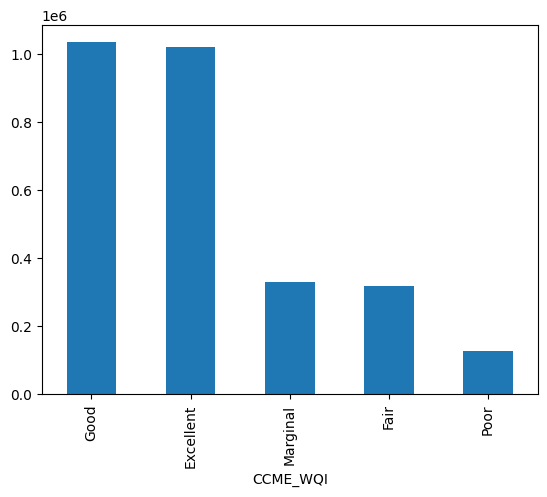

In [7]:
df["CCME_WQI"].value_counts().plot(kind="bar")

<Axes: xlabel='CCME_WQI'>

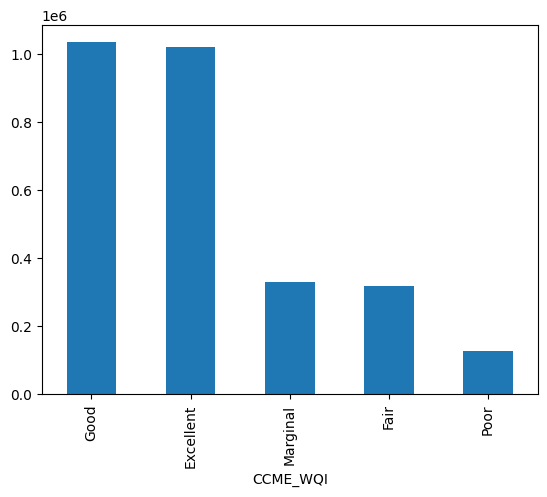

In [8]:
df["CCME_WQI"].value_counts().plot(kind="bar")

In [9]:
corr_data=df.select_dtypes(include="number").corr()

<Axes: >

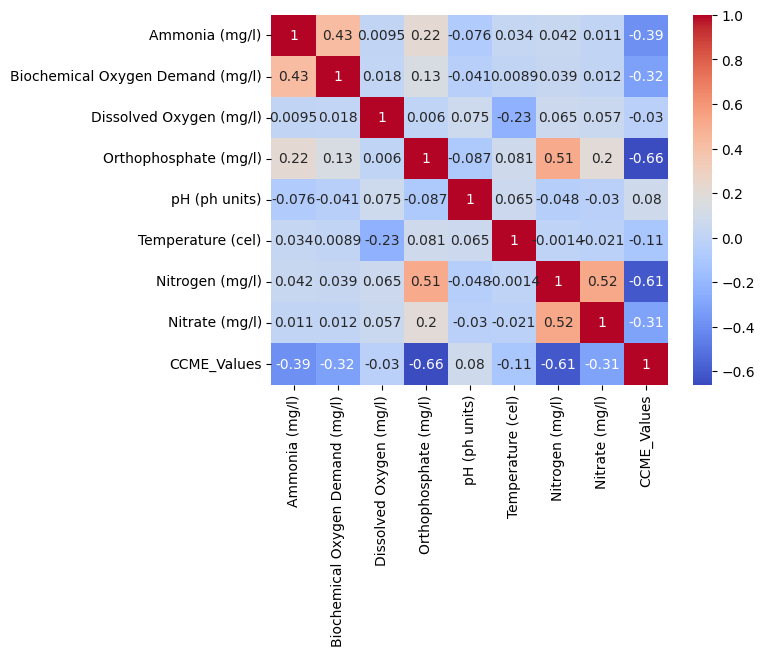

In [10]:
sns.heatmap(corr_data, annot=True, cmap='coolwarm')


In [11]:
df.duplicated().sum()

np.int64(9971)

In [ ]:
df[df.duplicated()]
  
duplicates_grouped = df.groupby(list(df.columns)).size().reset_index(name='count')

 
duplicates_grouped[duplicates_grouped['count'] > 1]

 


In [ ]:
df.isna().sum()

Country                             0
Area                                0
Waterbody Type                      0
Date                                0
Ammonia (mg/l)                      0
Biochemical Oxygen Demand (mg/l)    0
Dissolved Oxygen (mg/l)             0
Orthophosphate (mg/l)               0
pH (ph units)                       0
Temperature (cel)                   0
Nitrogen (mg/l)                     0
Nitrate (mg/l)                      0
CCME_Values                         0
CCME_WQI                            0
dtype: int64

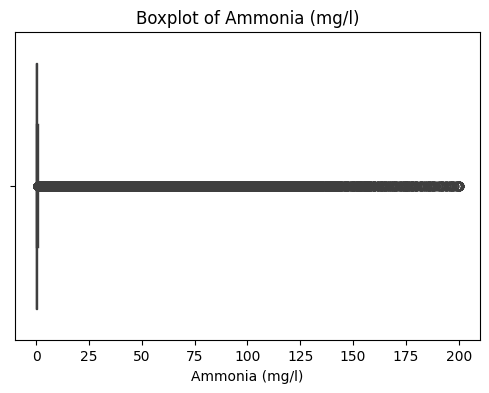

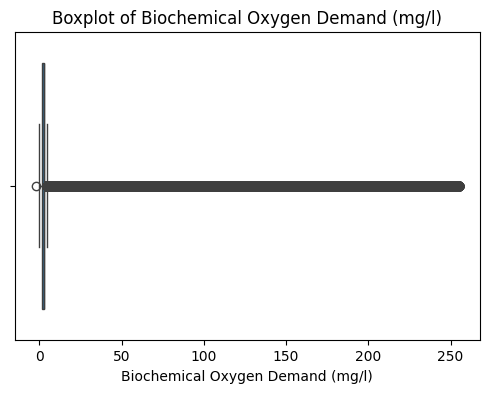

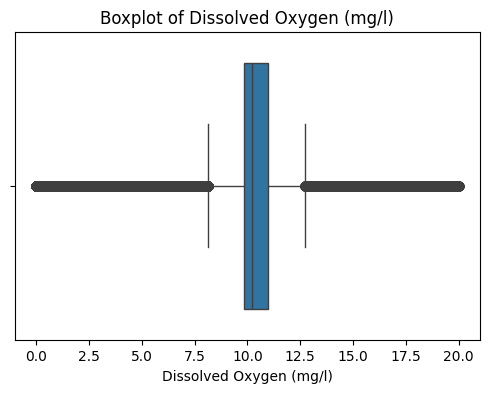

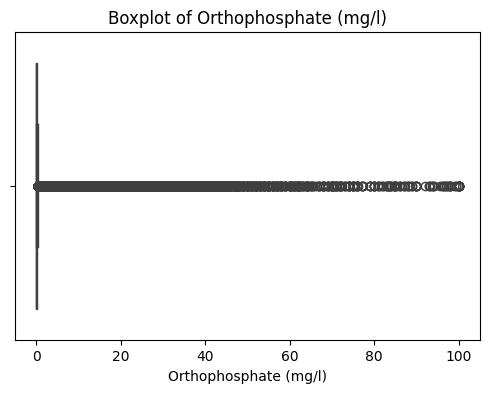

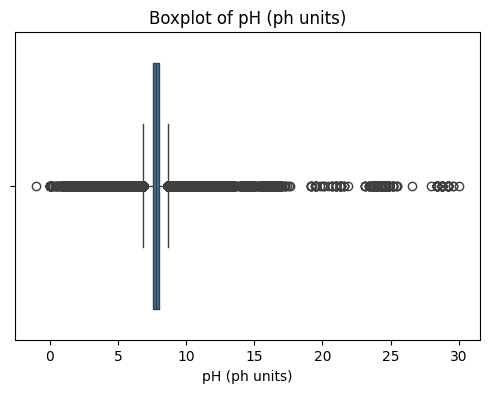

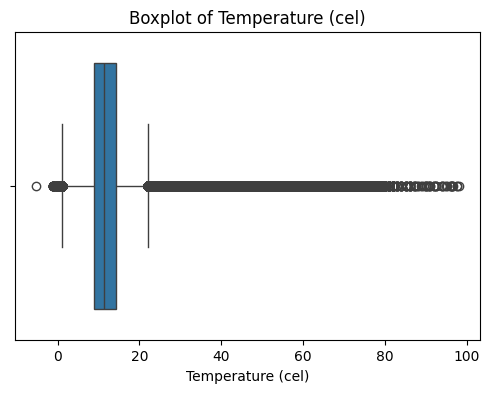

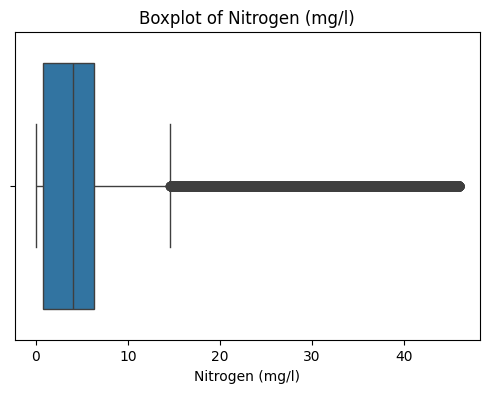

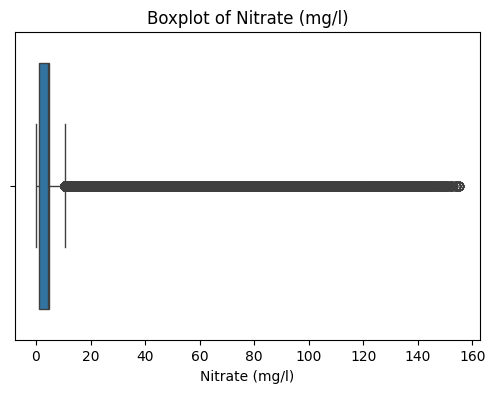

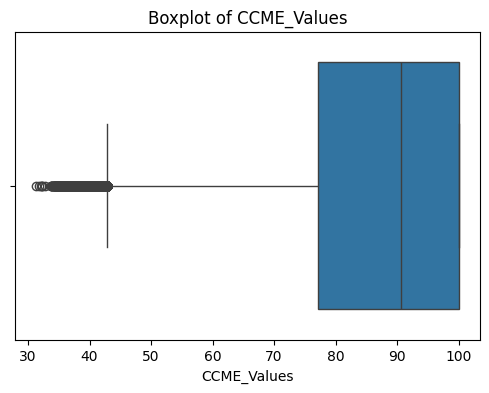

In [ ]:
numeric_cols = df.select_dtypes(include="number").columns

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


Value counts for Country:
Country
England    2129198
USA         413814
Ireland     235019
China        45997
Canada        3949
Name: count, dtype: int64


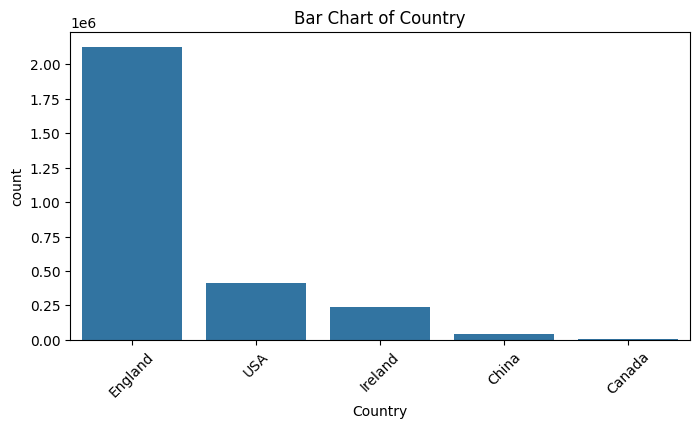


Value counts for Area:
Area
Lake Washington        54281
Hou Bay                45997
Lake Sammamish         26818
Central Puget Sound    22499
Los Angeles            21478
                       ...  
ES070ESPFBENI1             1
FRHR03105500               1
BADERANSKO-JEZERO          1
FISW_602                   1
DESM_DENI_48162282         1
Name: count, Length: 61689, dtype: int64


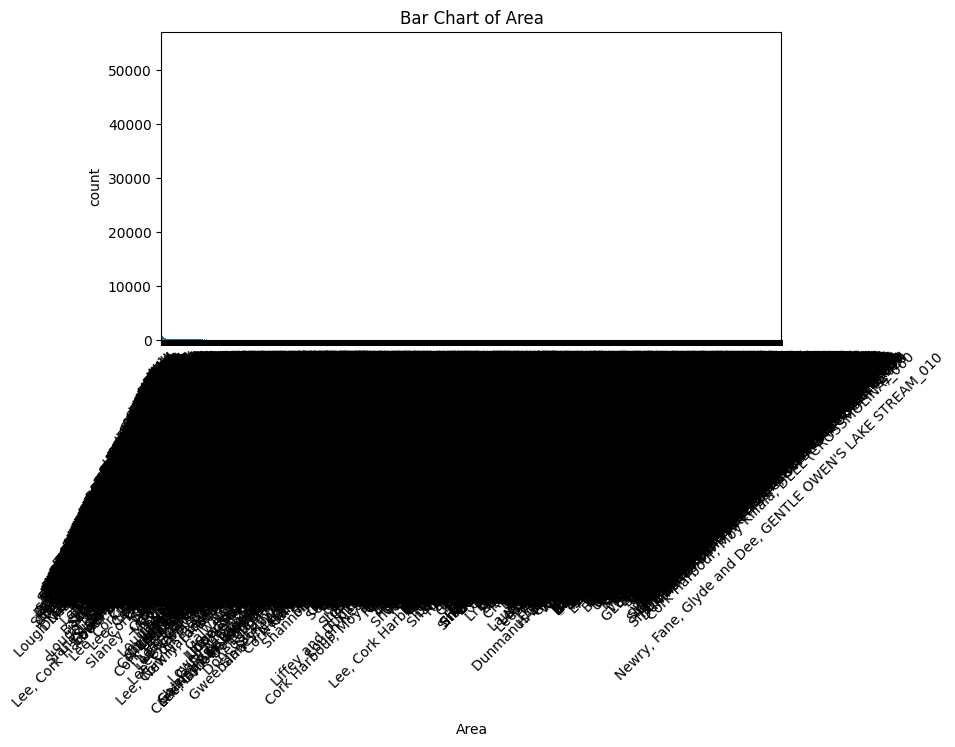


Value counts for Waterbody Type:
Waterbody Type
River           1852579
Effluent         601550
Lake             153603
Estuarine         49375
Bay               45997
Sea Water         32061
Canal             28574
Sewage            23777
Marine            23162
Drainage          10205
Transitional       4275
Coastal            2819
Name: count, dtype: int64


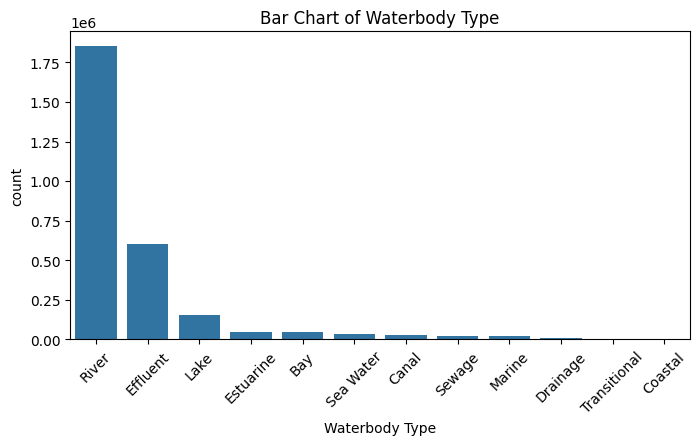


Value counts for Date:
Date
13-11-2008    922
12-03-2018    894
25-11-2013    881
19-11-2013    851
05-03-2014    837
             ... 
18-05-1996      1
23-12-2017      1
15-07-2023      1
23-10-1977      1
11-05-1994      1
Name: count, Length: 23876, dtype: int64


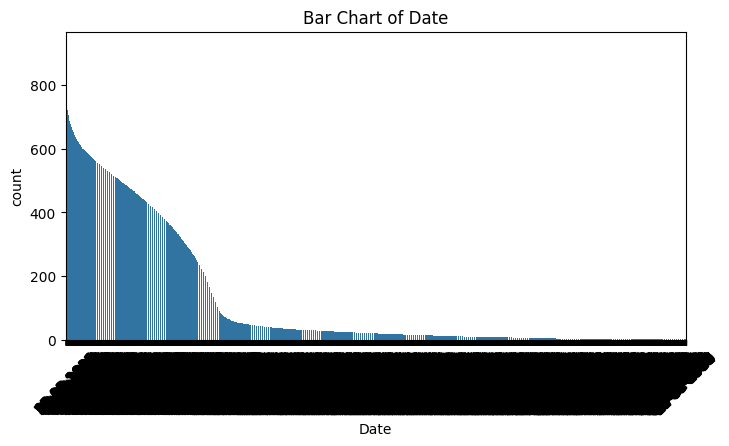


Value counts for CCME_WQI:
CCME_WQI
Good         1033709
Excellent    1020710
Marginal      328734
Fair          317856
Poor          126968
Name: count, dtype: int64


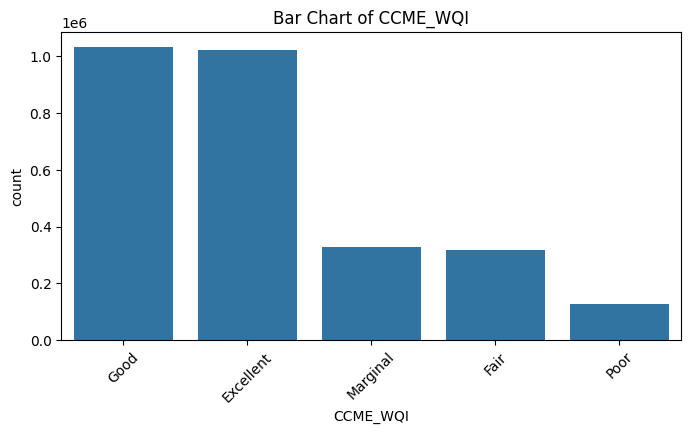

In [ ]:
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())
    
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Bar Chart of {col}')
    plt.xticks(rotation=45)
    plt.show()

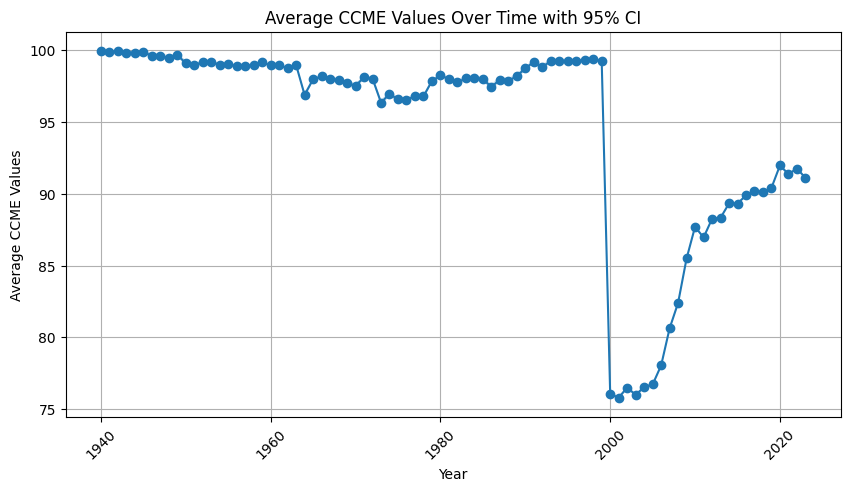

In [ ]:
 

 
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True, errors="coerce")

 
df["CCME_Values"] = pd.to_numeric(df["CCME_Values"], errors="coerce")

 
df["Year"] = df["Date"].dt.year

 
agg = df.groupby("Year")["CCME_Values"].agg(["mean","std","count"]).dropna()

 
agg["sem"] = agg["std"] / np.sqrt(agg["count"])
agg["ci95_low"] = agg["mean"] - 1.96 * agg["sem"]
agg["ci95_high"] = agg["mean"] + 1.96 * agg["sem"]

 
plt.figure(figsize=(10,5))
plt.plot(agg.index, agg["mean"], marker="o")
plt.fill_between(agg.index, agg["ci95_low"], agg["ci95_high"], alpha=0.2)
plt.xlabel("Year")
plt.ylabel("Average CCME Values")
plt.title("Average CCME Values Over Time with 95% CI")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


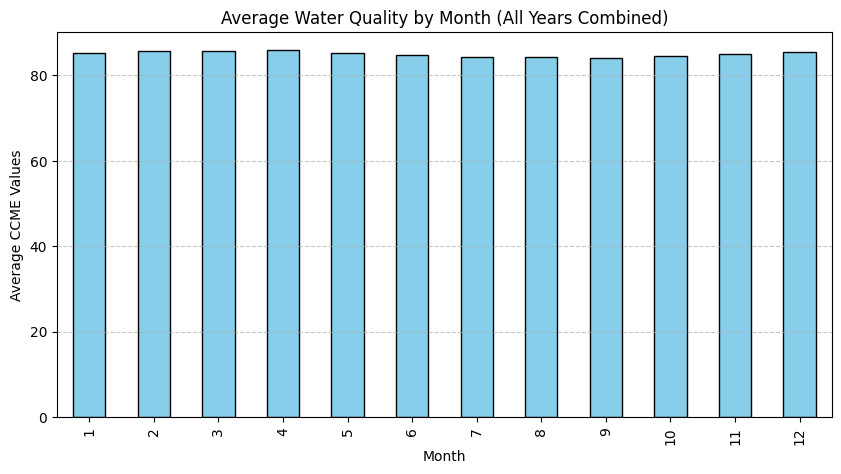

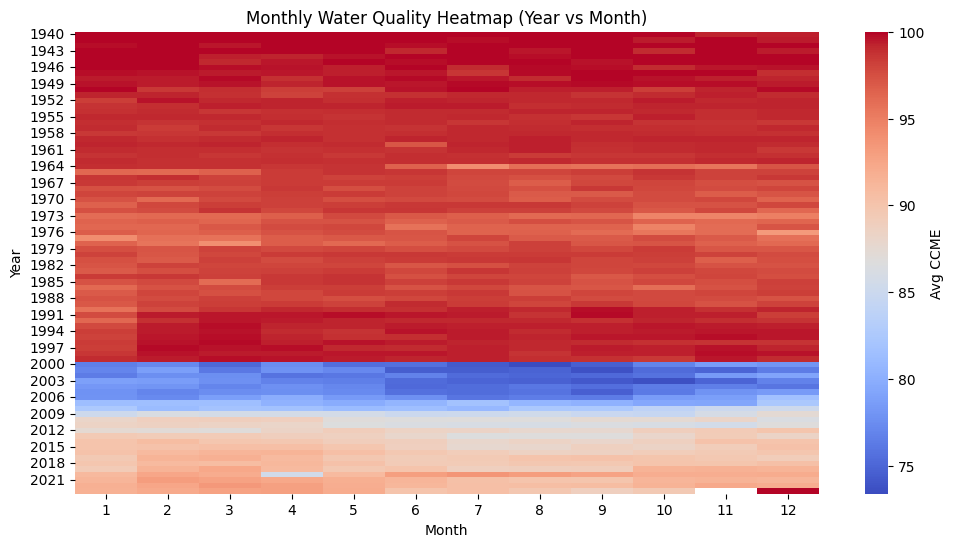

In [ ]:

df["Date"] = pd.to_datetime(df["Date"], dayfirst=True, errors="coerce")
 
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month

 
monthly_quality = df.groupby("Month")["CCME_Values"].mean()
plt.figure(figsize=(10, 5))
monthly_quality.plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("Month")
plt.ylabel("Average CCME Values")
plt.title("Average Water Quality by Month (All Years Combined)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


pivot = df.pivot_table(
    index="Year",
    columns="Month",
    values="CCME_Values",
    aggfunc="mean"
)

 
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap="coolwarm", annot=False, cbar_kws={'label': 'Avg CCME'})
plt.title("Monthly Water Quality Heatmap (Year vs Month)")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()


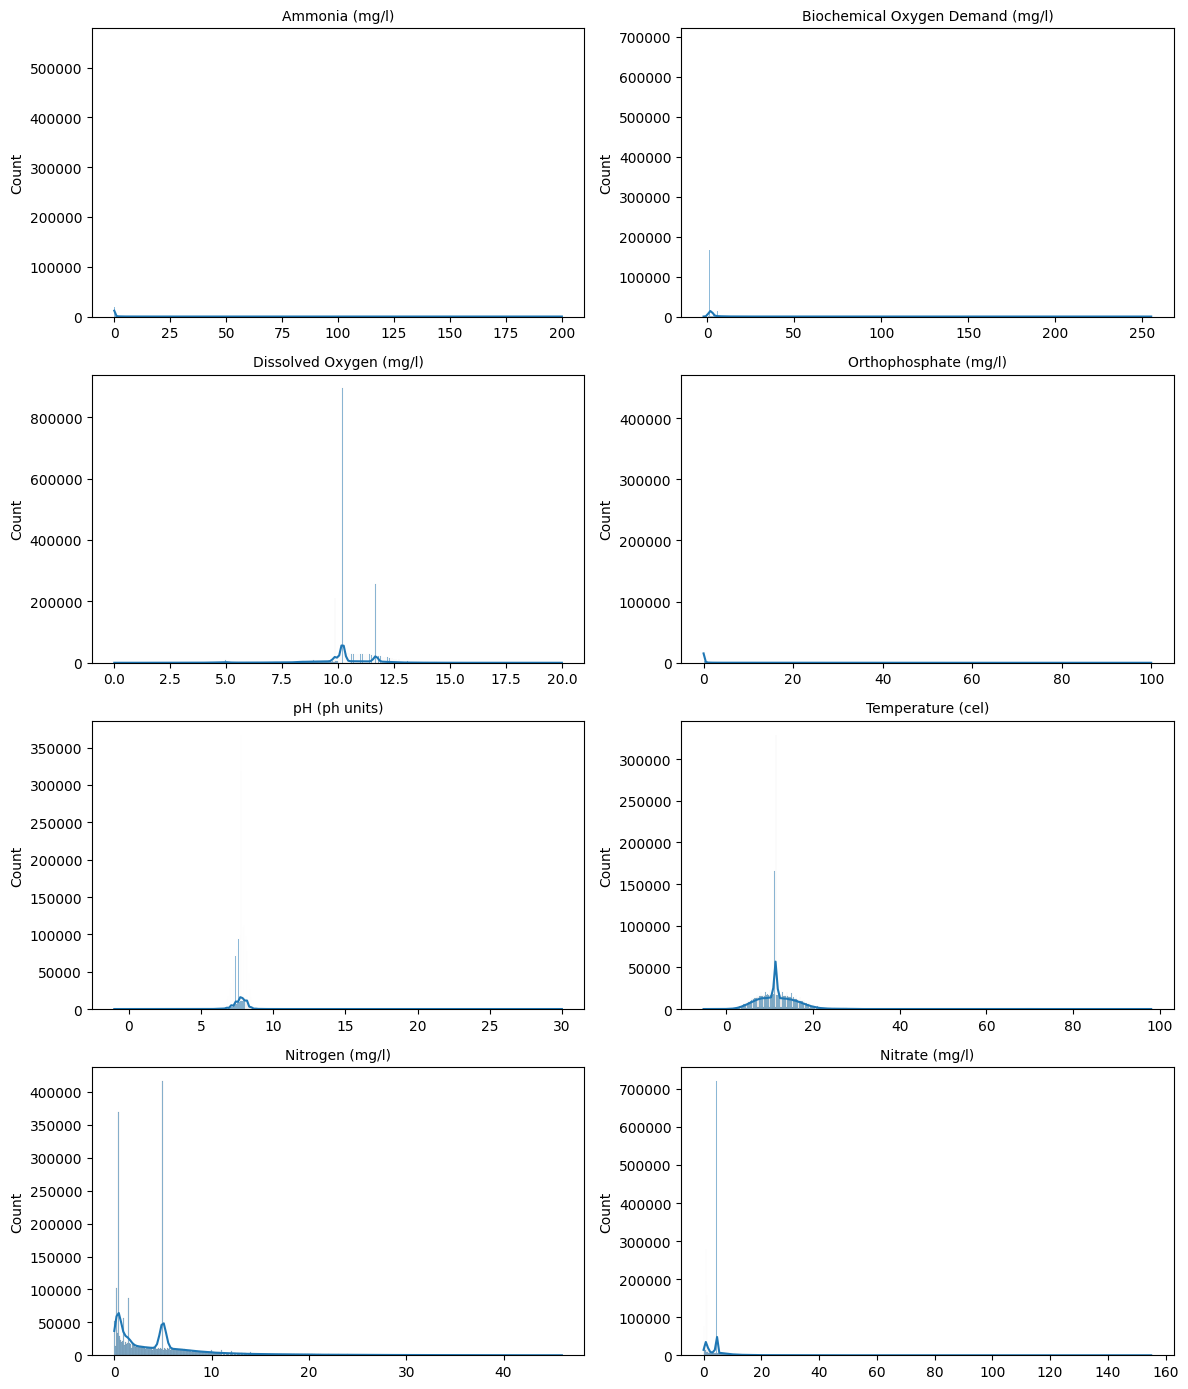

In [ ]:
 

 
features = [
    "Ammonia (mg/l)", 
    "Biochemical Oxygen Demand (mg/l)",
    "Dissolved Oxygen (mg/l)", 
    "Orthophosphate (mg/l)",
    "pH (ph units)", 
    "Temperature (cel)", 
    "Nitrogen (mg/l)", 
    "Nitrate (mg/l)"
]

 
n_rows = 4
n_cols = 2

 
plt.figure(figsize=(12, 14))

 
for i, col in enumerate(features, 1):    
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], kde=True)
    plt.title(f"{col}", fontsize=10)
    plt.xlabel("")  
    plt.ylabel("Count")

plt.tight_layout()   
plt.show()


In [ ]:
 
valid_ranges = {
    "Ammonia (mg/l)": (0, 20),
    "Biochemical Oxygen Demand (mg/l)": (0, 50),
    "Dissolved Oxygen (mg/l)": (2, 30),
    "Orthophosphate (mg/l)": (0, 10),
    "pH (ph units)": (4, 11),
    "Temperature (cel)": (0, 60),
    "Nitrogen (mg/l)": (0, 50),
    "Nitrate (mg/l)": (0, 100),
    "CCME_Values": (0, 100)
}

 
mask_valid = pd.Series(True, index=df.index)

for col, (low, high) in valid_ranges.items():
    mask_valid &= df[col].between(low, high, inclusive="both")

 
df_clean = df[mask_valid].copy()

 
print("Before cleaning:", df.shape[0], "rows")
print("After cleaning:", df_clean.shape[0], "rows")
print("Removed:", df.shape[0] - df_clean.shape[0], "illogical rows")

Before cleaning: 2827977 rows
After cleaning: 2734630 rows
Removed: 93347 illogical rows


In [ ]:
df_clean

,Country,Area,Waterbody Type,Date,Ammonia (mg/l),Biochemical Oxygen Demand (mg/l),Dissolved Oxygen (mg/l),Orthophosphate (mg/l),pH (ph units),Temperature (cel),Nitrogen (mg/l),Nitrate (mg/l),CCME_Values,CCME_WQI,Year,Month
0,Canada,SE649035-145565,River,1974-01-12,0.059248,1.30,8.1500,0.011917,8.07500,9.885,0.343917,11.73155,100.0,Excellent,1974,1
1,Canada,SE649035-145565,River,1975-01-12,0.039821,1.38,7.8000,0.009417,7.73333,10.150,0.449083,11.82009,100.0,Excellent,1975,1
2,Canada,SE649035-145565,River,1976-01-12,0.031341,2.23,7.8000,0.011000,7.46667,10.235,0.220750,14.87472,100.0,Excellent,1976,1
3,Canada,SE649035-145565,River,1977-01-12,0.020501,1.61,8.1500,0.012333,7.78333,11.116,0.572250,15.89293,100.0,Excellent,1977,1
4,Canada,SE649035-145565,River,1978-01-12,0.020023,1.64,4.3708,0.006182,7.10000,7.068,0.371091,15.22888,100.0,Excellent,1978,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2827972,Ireland,"Cork Harbour, Moy Killala, YELLOW (KNOCK)_020",River,2022-06-21,0.024000,1.40,4.2930,0.025000,7.90000,16.200,0.370000,0.37000,100.0,Excellent,2022,6
2827973,Ireland,"Cork Harbour, Moy Killala, YELLOW (KNOCK)_020",River,2022-09-28,0.038000,1.40,4.4955,0.025000,7.90000,11.400,0.540000,0.54000,100.0,Excellent,2022,9
2827974,Ireland,"Cork Harbour, Moy Killala, YELLOW (KNOCK)_020",River,2022-11-29,0.035000,1.40,4.4640,0.016000,7.60000,6.200,0.800000,0.79000,100.0,Excellent,2022,11
2827975,Ireland,"Cork Harbour, Moy Killala, YELLOW (KNOCK)_020",River,2023-02-07,0.046000,1.40,4.1760,0.012000,8.00000,7.800,0.950000,1.30000,100.0,Excellent,2023,2


In [ ]:
df_clean = df_clean.drop_duplicates()

 
print("Number of rows after removing duplicates:", df_clean.shape[0])

Number of rows after removing duplicates: 2724675


In [ ]:
df_clean['CCME_WQI'] = df_clean['CCME_WQI'].replace({'Marginal': 'Non-Potable Water', 'Poor': 'Non-Potable Water'}) 

C:\Users\O\AppData\Local\Temp\ipykernel_2616\1894763958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['CCME_WQI'] = df_clean['CCME_WQI'].replace({'Marginal': 'Non-Potable Water', 'Poor': 'Non-Potable Water'})


<Axes: xlabel='CCME_WQI'>

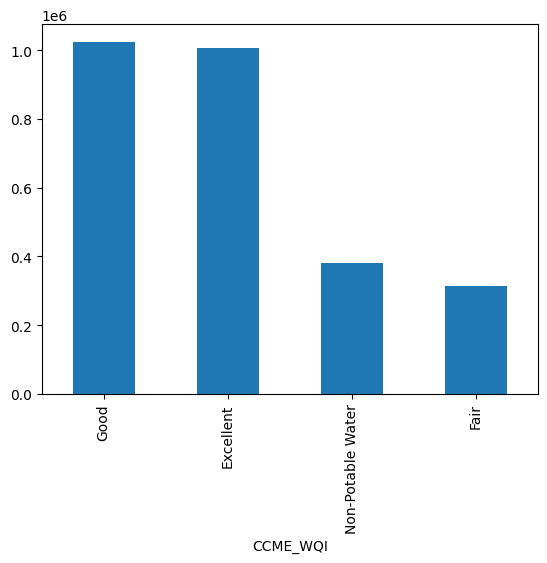

In [ ]:
df_clean["CCME_WQI"].value_counts().plot(kind="bar")

In [ ]:
 
df_clean['Waterbody Type'] = df_clean['Waterbody Type'].replace({
    'Marine': 'Coastal/Marine',
    'Sea Water': 'Coastal/Marine',
    'Coastal': 'Coastal/Marine',
    'Estuarine': 'Coastal/Marine',
    'Sewage': 'Wastewater',
    'Effluent': 'Wastewater',
    'Canal': 'Artificial',
    'Drainage': 'Artificial',
    'Bay': 'Minor Waterbodies',
    'Artificial': 'Minor Waterbodies',
    'Transitional': 'Minor Waterbodies'
})

 
df_encoded = pd.get_dummies(df_clean, columns=['Waterbody Type'],dtype="int")



C:\Users\O\AppData\Local\Temp\ipykernel_2616\705561465.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Waterbody Type'] = df_clean['Waterbody Type'].replace({


In [ ]:
df_clean['Waterbody Type'].value_counts()

Waterbody Type
River                1819056
Wastewater            567289
Lake                  146316
Coastal/Marine        105160
Minor Waterbodies      49613
Artificial             37241
Name: count, dtype: int64

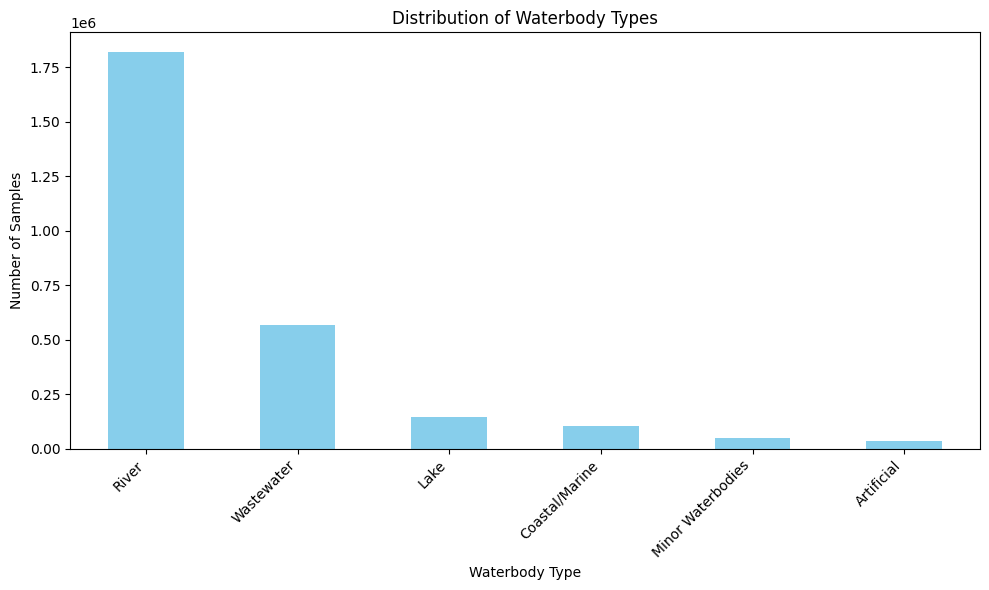

In [ ]:
distribution =  df_clean['Waterbody Type'].value_counts()


plt.figure(figsize=(10, 6))
distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Waterbody Types')
plt.xlabel('Waterbody Type')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
df_encoded

,Country,Area,Date,Ammonia (mg/l),Biochemical Oxygen Demand (mg/l),Dissolved Oxygen (mg/l),Orthophosphate (mg/l),pH (ph units),Temperature (cel),Nitrogen (mg/l),...,CCME_Values,CCME_WQI,Year,Month,Waterbody Type_Artificial,Waterbody Type_Coastal/Marine,Waterbody Type_Lake,Waterbody Type_Minor Waterbodies,Waterbody Type_River,Waterbody Type_Wastewater
0,Canada,SE649035-145565,1974-01-12,0.059248,1.30,8.1500,0.011917,8.07500,9.885,0.343917,...,100.0,Excellent,1974,1,0,0,0,0,1,0
1,Canada,SE649035-145565,1975-01-12,0.039821,1.38,7.8000,0.009417,7.73333,10.150,0.449083,...,100.0,Excellent,1975,1,0,0,0,0,1,0
2,Canada,SE649035-145565,1976-01-12,0.031341,2.23,7.8000,0.011000,7.46667,10.235,0.220750,...,100.0,Excellent,1976,1,0,0,0,0,1,0
3,Canada,SE649035-145565,1977-01-12,0.020501,1.61,8.1500,0.012333,7.78333,11.116,0.572250,...,100.0,Excellent,1977,1,0,0,0,0,1,0
4,Canada,SE649035-145565,1978-01-12,0.020023,1.64,4.3708,0.006182,7.10000,7.068,0.371091,...,100.0,Excellent,1978,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2827972,Ireland,"Cork Harbour, Moy Killala, YELLOW (KNOCK)_020",2022-06-21,0.024000,1.40,4.2930,0.025000,7.90000,16.200,0.370000,...,100.0,Excellent,2022,6,0,0,0,0,1,0
2827973,Ireland,"Cork Harbour, Moy Killala, YELLOW (KNOCK)_020",2022-09-28,0.038000,1.40,4.4955,0.025000,7.90000,11.400,0.540000,...,100.0,Excellent,2022,9,0,0,0,0,1,0
2827974,Ireland,"Cork Harbour, Moy Killala, YELLOW (KNOCK)_020",2022-11-29,0.035000,1.40,4.4640,0.016000,7.60000,6.200,0.800000,...,100.0,Excellent,2022,11,0,0,0,0,1,0
2827975,Ireland,"Cork Harbour, Moy Killala, YELLOW (KNOCK)_020",2023-02-07,0.046000,1.40,4.1760,0.012000,8.00000,7.800,0.950000,...,100.0,Excellent,2023,2,0,0,0,0,1,0


In [ ]:
X = df_encoded.drop(columns=["CCME_WQI","Country","Area","Date","Year","CCME_Values"])   
y = df_encoded["CCME_WQI"]


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [ ]:
# -------------------------------
# 1. Define custom order for classes
# -------------------------------
class_order = ["Non-Potable Water", "Fair", "Good", "Excellent"]

cat_type = pd.CategoricalDtype(categories=class_order, ordered=True)
y = y.astype(cat_type)
y_int = y.cat.codes.values

# -------------------------------
# 2. Numeric & Categorical features
# -------------------------------
num_features = [
    "Ammonia (mg/l)", "Biochemical Oxygen Demand (mg/l)",
    "Dissolved Oxygen (mg/l)", "Orthophosphate (mg/l)",
    "pH (ph units)", "Temperature (cel)",
    "Nitrogen (mg/l)", "Nitrate (mg/l)"
]

num_X = X[num_features]
cat_X = X.drop(columns=num_features)

# -------------------------------
# 3. Split data *by order* (time-based)
# -------------------------------
n = len(X)
train_size = int(0.8 * n)  # 80% train, 20% test

# No shuffle → keeps order
X_train_num = num_X.iloc[:train_size]
X_test_num  = num_X.iloc[train_size:]

cat_train = cat_X.iloc[:train_size]
cat_test  = cat_X.iloc[train_size:]

y_train = y_int[:train_size]
y_test  = y_int[train_size:]

print("✅ Train size:", X_train_num.shape)
print("✅ Test size:", X_test_num.shape)

# -------------------------------
# 4. Preprocessing pipeline
# -------------------------------
numeric_transformer = Pipeline(steps=[
    ('power', PowerTransformer(method='yeo-johnson')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features)
    ]
)

# -------------------------------
# 5. Apply transformations
# -------------------------------
X_train_num_processed = preprocessor.fit_transform(X_train_num)
X_test_num_processed = preprocessor.transform(X_test_num)

X_train_processed = np.hstack([X_train_num_processed, cat_train.values])
X_test_processed  = np.hstack([X_test_num_processed, cat_test.values])

# -------------------------------
# 6. Print info
# -------------------------------
print("\nClass mapping:", dict(zip(class_order, range(len(class_order)))))
print("Shape before:", X_train_num.shape, "+", cat_train.shape)
print("Shape after:", X_train_processed.shape)

print("\n✅ Sample class encoding:")
for i, cls in enumerate(class_order):
    idx = np.where(y_train == i)[0][0]
    print(f"{cls} → {y_train[idx]}")


✅ Train size: (2179740, 8)
✅ Test size: (544935, 8)

Class mapping: {'Non-Potable Water': 0, 'Fair': 1, 'Good': 2, 'Excellent': 3}
Shape before: (2179740, 8) + (2179740, 7)
Shape after: (2179740, 15)

✅ Sample class encoding:
Non-Potable Water → 0
Fair → 1
Good → 2
Excellent → 3


In [ ]:
print (X_train_processed.shape) 

(2179740, 15)


In [ ]:
 

n_train = len(X_train_processed)
val_size = int(0.2 * n_train)   

X_train_split = X_train_processed[:-val_size]
y_train_split = y_train[:-val_size]

X_val_split = X_train_processed[-val_size:]
y_val_split = y_train[-val_size:]

print("Train split shape:", X_train_split.shape, y_train_split.shape)
print("Val   split shape:", X_val_split.shape,   y_val_split.shape)


Train split shape: (1743792, 15) (1743792,)
Val   split shape: (435948, 15) (435948,)


In [ ]:

# X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
#     X_train_processed, y_train, test_size=0.2, random_state=42, stratify=y_train
# )
# print("Train split shape:", X_train_split.shape, y_train_split.shape)
# print("Val   split shape:", X_val_split.shape,   y_val_split.shape)


In [ ]:
# sm = SMOTE(random_state=42)
# X_res_flat, y_res = sm.fit_resample(X_train_split, y_train_split)
# print("After SMOTE (flat):", X_res_flat.shape, y_res.shape)

In [ ]:


# def trim_to_full_sequences(X, y, seq_len):
 
#     n_samples = len(X)
#     n_full = n_samples // seq_len
#     X_trimmed = X[:n_full * seq_len]
#     y_trimmed = y[:n_full * seq_len]
#     return X_trimmed, y_trimmed


 
 
# seq_len = 90

# X_train_clean, y_train_clean = trim_to_full_sequences(X_train_split, y_train_split, seq_len)
# X_val_clean,   y_val_clean   = trim_to_full_sequences(X_val_split, y_val_split, seq_len)
# X_test_clean,  y_test_clean  = trim_to_full_sequences(X_test_processed, y_test, seq_len)

# print(X_train_clean.shape)

In [ ]:
# import numpy as np

# def build_sequences_seq2seq(X, y, seq_len):
#     """
#     يبني تسلسلات بحيث كل خطوة زمنية داخل السلسلة ليها label خاص بيها.
#     يعني الناتج y_seq هيكون [batch, seq_len].
#     """
#     X_seq, y_seq = [], []
    
#     # نقطع البيانات على شكل تسلسلات متجاورة بطول ثابت
#     for i in range(0, len(X) - seq_len + 1, seq_len):
#         X_seq.append(X[i:i+seq_len])
#         y_seq.append(y[i:i+seq_len])
    
#     return np.array(X_seq), np.array(y_seq)


# # 👇 استخدام الدالة على بياناتك
# seq_len = 90

# X_train_seq, y_train_seq = build_sequences_seq2seq(X_train_split, y_train_split, seq_len)
# X_val_seq,   y_val_seq   = build_sequences_seq2seq(X_val_split, y_val_split, seq_len)
# X_test_seq,  y_test_seq  = build_sequences_seq2seq(X_test_processed, y_test, seq_len)

# print("Train:", X_train_seq.shape, y_train_seq.shape)
# print("Val:",   X_val_seq.shape,   y_val_seq.shape)
# print("Test:",  X_test_seq.shape,  y_test_seq.shape)

# # ✅ لو الموديل بياخد الشكل [Batch, Channels, Seq_len] زي CNN-LSTM:
# X_train_seq = X_train_seq.transpose(0, 2, 1)
# X_val_seq   = X_val_seq.transpose(0, 2, 1)
# X_test_seq  = X_test_seq.transpose(0, 2, 1)

# print("\nبعد التحويل:")
# print("Train:", X_train_seq.shape, y_train_seq.shape)
# print("Val:",   X_val_seq.shape,   y_val_seq.shape)
# print("Test:",  X_test_seq.shape,  y_test_seq.shape)


In [ ]:
 
# X_train_tensor = torch.tensor(X_train_seq, dtype=torch.float32)
# y_train_tensor = torch.tensor(y_train_seq, dtype=torch.long)

# X_val_tensor   = torch.tensor(X_val_seq, dtype=torch.float32)
# y_val_tensor   = torch.tensor(y_val_seq, dtype=torch.long)

# X_test_tensor  = torch.tensor(X_test_seq, dtype=torch.float32)
# y_test_tensor  = torch.tensor(y_test_seq, dtype=torch.long)

 
# train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
# val_dataset   = TensorDataset(X_val_tensor,   y_val_tensor)
# test_dataset  = TensorDataset(X_test_tensor,  y_test_tensor)

# train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
# val_loader   = DataLoader(val_dataset,   batch_size=128, shuffle=False)
# test_loader  = DataLoader(test_dataset,  batch_size=128, shuffle=False)


In [ ]:
# class CNN_CRNN_M5T(nn.Module):
#     def __init__(self, in_channels=15, num_classes=4):
#         super(CNN_CRNN_M5T, self).__init__()
#         self.cnn = nn.Sequential(
#             nn.Conv1d(in_channels, 64, kernel_size=5, padding=2),
#             nn.BatchNorm1d(64),
#             nn.ReLU(),
#             nn.MaxPool1d(2),
#             nn.Conv1d(64, 128, kernel_size=3, padding=1),
#             nn.BatchNorm1d(128),
#             nn.ReLU(),
#             nn.MaxPool1d(2)
#         )
#         self.lstm = nn.LSTM(input_size=128, hidden_size=256, num_layers=2, batch_first=True, bidirectional=True)
#         encoder_layer = nn.TransformerEncoderLayer(d_model=512, nhead=8, dim_feedforward=1024, dropout=0.3, batch_first=True)
#         self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=2)
#         self.fc = nn.Sequential(
#             nn.Linear(512, 128),
#             nn.ReLU(),
#             nn.Dropout(0.3),
#             nn.Linear(128, num_classes)
#         )

#     def forward(self, x, return_features=False):
#         # ---- CNN ----
#         x = self.cnn(x)             # [B, C, L]
#         x = x.permute(0, 2, 1)      # [B, L, C]

#         # ---- LSTM ----
#         out, _ = self.lstm(x)       # [B, L, 512] (لأنها bidirectional)
#         out = self.transformer(out) # [B, L, 512]

#         # ✅ بدل ما نعمل mean → نطلع output عند كل خطوة
#         logits = self.fc(out)       # [B, L, num_classes]

#         if return_features:
#             return out, logits
#         return logits




In [ ]:
# def extract_features(model, data_tensor, device=torch.device("cpu")):
#     model.eval()
#     model.to(device)
#     data_tensor = data_tensor.to(device)
#     all_feats = []
#     with torch.no_grad():
#         for xb in DataLoader(TensorDataset(data_tensor), batch_size=64):
#             xb = xb[0].to(device)
#             feats, _ = model(xb, return_features=True)
#             all_feats.append(feats.cpu().numpy())
#   # ممكن نعمل mean على الزمن
  
#     return np.vstack(all_feats)


In [ ]:
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# model = CNN_CRNN_M5T(in_channels=15, num_classes=4).to(device)
# optimizer = torch.optim.Adam(model.parameters(), lr=5e-4)
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)
# classes = np.unique(y_train_seq)
# weights = compute_class_weight('balanced', classes=classes, y=y_train_seq.flatten())
# weights = torch.tensor(weights, dtype=torch.float32).to(device)
# criterion = nn.CrossEntropyLoss(weight=weights)

# train_losses, val_losses, train_accs, val_accs = [], [], [], []
# num_epochs = 50

# for epoch in range(num_epochs):
#     model.train()
#     train_loss, correct_train, total_train = 0, 0, 0

#     for xb, yb in train_loader:
#         xb, yb = xb.to(device), yb.to(device)

#         optimizer.zero_grad()
#         logits = model(xb)               # [B, L_out, num_classes]
#         logits = logits.permute(0, 2, 1) # [B, num_classes, L_out]

#         # ✅ قصّ yb لتساوي طول الإخراج تلقائيًا
#         if yb.size(1) != logits.size(2):
#             yb = yb[:, :logits.size(2)]

#         loss = criterion(logits, yb)
#         loss.backward()
#         optimizer.step()

#         train_loss += loss.item() * xb.size(0)
#         preds = torch.argmax(logits, dim=1)
#         correct_train += (preds == yb).sum().item()
#         total_train += yb.numel()

#     avg_train_loss = train_loss / total_train
#     train_acc = correct_train / total_train

#     # ---- VALIDATION ----
#     model.eval()
#     val_loss, correct_val, total_val = 0, 0, 0
#     with torch.no_grad():
#         for xb, yb in val_loader:
#             xb, yb = xb.to(device), yb.to(device)
#             logits = model(xb)
#             logits = logits.permute(0, 2, 1)

#             if yb.size(1) != logits.size(2):
#                 yb = yb[:, :logits.size(2)]

#             loss = criterion(logits, yb)
#             val_loss += loss.item() * xb.size(0)

#             preds = torch.argmax(logits, dim=1)
#             correct_val += (preds == yb).sum().item()
#             total_val += yb.numel()

#     avg_val_loss = val_loss / total_val
#     val_acc = correct_val / total_val

#     train_losses.append(avg_train_loss)
#     val_losses.append(avg_val_loss)
#     train_accs.append(train_acc)
#     val_accs.append(val_acc)
#     scheduler.step()

#     print(f"Epoch [{epoch+1}/{num_epochs}] "
#           f"Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}, "
#           f"Train Acc: {train_acc*100:.2f}%, Val Acc: {val_acc*100:.2f}%")


In [ ]:
# import numpy as np
# import torch.nn as nn
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score, classification_report

# # ------------------------------
# # 1️⃣ دالة لحساب reduction_factor تلقائيًا من الموديل
# # ------------------------------
# def get_reduction_factor(model):
#     reduction = 1
#     for layer in model.modules():
#         if isinstance(layer, nn.MaxPool1d):
#             reduction *= layer.kernel_size if isinstance(layer.kernel_size, int) else layer.kernel_size[0]
#     return reduction

# # ------------------------------
# # 2️⃣ دالة لتقليل طول الـ labels بناءً على reduction_factor
# # ------------------------------
# def downsample_labels(y_seq, reduction_factor):
#     new_y = []
#     for seq in y_seq:
#         reduced = seq[::reduction_factor]
#         new_y.append(reduced)
#     return np.array(new_y, dtype=object)

# # ------------------------------
# # 3️⃣ دالة لتوحيد طول الـ features والـ labels (لو فيه mismatch)
# # ------------------------------
# def match_lengths(features_flat, labels_flat, name="set"):
#     if features_flat.shape[0] != labels_flat.shape[0]:
#         print(f"⚠️ Warning: mismatch in {name}! Fixing ...")
#         min_len = min(features_flat.shape[0], labels_flat.shape[0])
#         features_flat = features_flat[:min_len]
#         labels_flat = labels_flat[:min_len]
#         print(f"✅ {name} fixed to equal length = {min_len}")
#     return features_flat, labels_flat

# # ------------------------------
# # 4️⃣ تجهيز البيانات
# # ------------------------------
# reduction_factor = get_reduction_factor(model)
# print(f"✅ Reduction factor detected automatically: {reduction_factor}x")

# # ↓ قلل الـ labels بنفس عامل التقليص
# y_train_reduced = downsample_labels(y_train_seq, reduction_factor)
# y_val_reduced   = downsample_labels(y_val_seq, reduction_factor)
# y_test_reduced  = downsample_labels(y_test_seq, reduction_factor)

# # 🔹 تأكد أن الـ labels أرقام صحيحة (integer)
# y_train_reduced = [np.array(seq, dtype=int) for seq in y_train_reduced]
# y_val_reduced   = [np.array(seq, dtype=int) for seq in y_val_reduced]
# y_test_reduced  = [np.array(seq, dtype=int) for seq in y_test_reduced]

# # ------------------------------
# # 5️⃣ استخراج الـ features من الموديل
# # ------------------------------
# feats_train = extract_features(model, X_train_tensor, device=device)
# feats_val   = extract_features(model, X_val_tensor, device=device)
# feats_test  = extract_features(model, X_test_tensor, device=device)

# # ------------------------------
# # 6️⃣ Flatten — كل timestep = عينة مستقلة
# # ------------------------------
# feats_train_flat = np.concatenate(feats_train, axis=0)
# feats_val_flat   = np.concatenate(feats_val, axis=0)
# feats_test_flat  = np.concatenate(feats_test, axis=0)

# y_train_flat = np.concatenate(y_train_reduced, axis=0).astype(int)
# y_val_flat   = np.concatenate(y_val_reduced, axis=0).astype(int)
# y_test_flat  = np.concatenate(y_test_reduced, axis=0).astype(int)

# # ------------------------------
# # 7️⃣ تأكد من التوافق بين كل مجموعة
# # ------------------------------
# feats_train_flat, y_train_flat = match_lengths(feats_train_flat, y_train_flat, "train")
# feats_val_flat,   y_val_flat   = match_lengths(feats_val_flat,   y_val_flat,   "val")
# feats_test_flat,  y_test_flat  = match_lengths(feats_test_flat,  y_test_flat,  "test")

# # ------------------------------
# # 8️⃣ طباعة معلومات للتأكد
# # ------------------------------
# print("\n🔍 Checking data shapes and labels:")
# print("feats_train_flat shape:", feats_train_flat.shape)
# print("y_train_flat shape:", y_train_flat.shape)
# print("✅ unique labels:", np.unique(y_train_flat))
# print("✅ dtype:", y_train_flat.dtype)

# # ------------------------------
# # 9️⃣ تدريب Decision Tree
# # ------------------------------
# clf = DecisionTreeClassifier(max_depth=10, random_state=42)
# clf.fit(feats_train_flat, y_train_flat)

# # ------------------------------
# # 🔟 التقييم
# # ------------------------------
# preds_val = clf.predict(feats_val_flat)
# preds_test = clf.predict(feats_test_flat)

# # ✅ تأكد من تطابق الأطوال قبل الحساب
# feats_val_flat, y_val_flat = match_lengths(feats_val_flat, y_val_flat, "val (before eval)")
# feats_test_flat, y_test_flat = match_lengths(feats_test_flat, y_test_flat, "test (before eval)")

# print("\nValidation Accuracy:", accuracy_score(y_val_flat, preds_val))
# print("Test Accuracy:", accuracy_score(y_test_flat, preds_test))
# print("\nClassification Report (Validation):")
# print(classification_report(y_val_flat, preds_val))


In [ ]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(12,5))

 
# plt.subplot(1,2,1)
# plt.plot(train_losses, label="Train Loss")
# plt.plot(val_losses, label="Validation Loss")
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
# plt.title("Learning Curve (Loss)")
# plt.legend()
# plt.grid(True)

 
# plt.subplot(1,2,2)
# plt.plot(train_accs, label="Train Accuracy")
# plt.plot(val_accs, label="Validation Accuracy")
# plt.xlabel("Epochs")
# plt.ylabel("Accuracy")
# plt.title("Learning Curve (Accuracy)")
# plt.legend()
# plt.grid(True)

# plt.show()


In [ ]:
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
# import matplotlib.pyplot as plt

 

 
# test_acc = accuracy_score(y_test_seq, preds_test)
# print(f"\n🎯 Test Accuracy: {test_acc * 100:.2f}%")

# print("\n📊 Classification Report (Test Data):")
# print(classification_report(y_test_seq, preds_test))
 
# cm = confusion_matrix(y_test_seq, preds_test)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot(cmap="Blues", values_format='d')
# plt.title("Confusion Matrix - Final Model (Decision Tree on Transformer Features)")
# plt.show()



In [ ]:
 
# all_labels = y_test_seq
 
# all_probs = clf.predict_proba(feats_test)
 
# n_classes = len(np.unique(all_labels))
# y_true_bin = label_binarize(all_labels, classes=np.arange(n_classes))

 
# plt.figure(figsize=(8,6))
# for i in range(n_classes):
#     fpr, tpr, _ = roc_curve(y_true_bin[:, i], all_probs[:, i])
#     roc_auc = auc(fpr, tpr)
#     plt.plot(fpr, tpr, lw=2, label=f"Class {i} (AUC = {roc_auc:.2f})")

 
# plt.plot([0,1], [0,1], 'k--', lw=1.2)
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel("False Positive Rate", fontsize=12)
# plt.ylabel("True Positive Rate", fontsize=12)
# plt.title("ROC Curves (One-vs-Rest) - M5T Final Model", fontsize=14)
# plt.legend(loc="lower right")
# plt.grid(alpha=0.3)
# plt.show()


In [ ]:
# متطلبات: torch, numpy, pandas, sklearn, matplotlib, seaborn
 
from sklearn.feature_selection import f_classif
 

 

# ***************************************
# 1) إحصاء ANOVA (f_classif) لاختيار المتغيرات المهمة (p < 0.05)
# ***************************************
def select_by_anova(X_num, y_int, alpha=0.05):
    # X_num: numpy array (n_samples, n_num_features)
    F, pvals = f_classif(X_num, y_int)
    mask = pvals < alpha
    return mask, F, pvals

# ***************************************
# 2) بناء تسلسلات (sequence-level labels) بدون shuffle (time-order)
#    هنا نفترض أن كل فترة (seq_len) لها label موحّد — نحتفظ label آخر العنصر في الفترة
#    يمكنك تغييره إلى mode أو mean لو تريد.
# ***************************************
def build_sequences(X_array, y_array, seq_len):
    # X_array: (n_samples, n_features)
    # y_array: (n_samples,)
    n = len(X_array)
    n_full = (n // seq_len) * seq_len
    X_trim = X_array[:n_full]
    y_trim = y_array[:n_full]
    # reshape into (n_sequences, seq_len, n_features)
    n_seq = n_full // seq_len
    X_seq = X_trim.reshape(n_seq, seq_len, -1)
    y_seq = y_trim.reshape(n_seq, seq_len)
    # label per sequence: هنا نستخدم آخر قيمة كـ label للفترة
    y_seq_label = y_seq[:, -1]
    # For seq2seq use y_seq (we will use sequence-level)
    return X_seq, y_seq_label

In [ ]:
 

# ***************************************
# 3) Clockwork RNN (تقريبي، تحديث خطوة بخطوة)
#    بسيط: بنقسم الخلايا لـ bands، كل band يحدث كل period
# ***************************************
class ClockworkRNN(nn.Module):
    def __init__(self, input_size, hidden_size, bands_periods):
        """
        bands_periods: list of periods per band, e.g. [1,2,4,8]
        hidden_size: total hidden dim will be hidden_size_per_band * n_bands
        """
        super().__init__()
        self.periods = bands_periods
        self.n_bands = len(bands_periods)
        # hidden per band
        self.hsz_per = hidden_size // self.n_bands
        assert self.hsz_per * self.n_bands == hidden_size, "hidden_size must be divisible by n_bands"
        # create an RNNCell per band (use GRUCell for speed/stability)
        self.cells = nn.ModuleList([
            nn.GRUCell(input_size + i * self.hsz_per, self.hsz_per)
            for i in range(self.n_bands)
        ])
        # linear to combine band outputs to a single vector per time
        self.out_linear = nn.Linear(hidden_size, hidden_size)

    def forward(self, x):
        # x: (B, L, input_size)
        B, L, I = x.shape
        device = x.device
        # init hidden states per band
        h = [torch.zeros(B, self.hsz_per, device=device) for _ in range(self.n_bands)]
        outputs = []
        for t in range(L):
            xt = x[:, t, :]  # (B, I)
            band_outputs = []
            for i, period in enumerate(self.periods):
                if (t % period) == 0:
                    # input to cell: concat(xt, prev_band_output_sum) OR simple xt
                    prev_out = torch.cat([h[j] for j in range(i)], dim=1) if i > 0 else None
                    if prev_out is not None:
                        cell_in = torch.cat([xt, prev_out], dim=1)
                    else:
                        cell_in = xt
                    h[i] = self.cells[i](cell_in, h[i])
                # else keep previous h[i]
                band_outputs.append(h[i])
            # concat band outputs
            concat = torch.cat(band_outputs, dim=1)  # (B, hidden_size)
            outputs.append(concat.unsqueeze(1))
        out = torch.cat(outputs, dim=1)  # (B, L, hidden_size)
        out = self.out_linear(out)       # optional transform
        return out  # (B, L, hidden_size)

In [ ]:
class CNN_CWRNN(nn.Module):
    def __init__(self, in_channels, cnn_channels=64, hidden_size=256, n_classes=None):
        super().__init__()
        self.cnn = nn.Sequential(
            nn.Conv1d(in_channels, 64, kernel_size=5, padding=2),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.MaxPool1d(2),
            nn.Conv1d(64, 192, kernel_size=3, padding=1),
            nn.BatchNorm1d(192),
            nn.ReLU(),
        )


        # ✅ أضف هذه الطبقة بعد CNN
        self.proj = nn.Linear(192, 128)


        periods = [1, 2, 4, 8]
        self.cwrnn = ClockworkRNN(input_size=128, hidden_size=256, bands_periods=periods)


        if n_classes is not None:
            self.classifier = nn.Sequential(
                nn.Linear(hidden_size, 128),
                nn.ReLU(),
                nn.Dropout(0.3),
                nn.Linear(128, n_classes)
            )
        else:
            self.classifier = None

    def forward(self, x, return_sequence=False, return_features=False):
        z = self.cnn(x)
        z = z.permute(0, 2, 1)
        z = self.proj(z)      # ✅ هنا التحويل الجديد
        out_seq = self.cwrnn(z)
        pooled = out_seq.mean(dim=1)
        logits = self.classifier(pooled) if self.classifier is not None else None
        if return_sequence:
            return out_seq
        if return_features:
            return pooled, logits
        return logits


In [ ]:
 
# ***************************************
# 5) Training loop for sequence-level classification (train CNN_CWRNN end-to-end)
# ***************************************
def train_sequence_model(model, train_loader, val_loader, device, epochs=50, lr=3e-4, class_weights=None):
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    if class_weights is None:
        criterion = nn.CrossEntropyLoss()
    else:
        criterion = nn.CrossEntropyLoss(weight=class_weights.to(device))
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)

    for ep in range(epochs):
        model.train()
        total_loss = 0.0
        correct = 0
        total = 0
        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            optimizer.zero_grad()
            logits = model(xb)  # (B, n_classes)
            loss = criterion(logits, yb)
            loss.backward()
            optimizer.step()
            total_loss += loss.item() * xb.size(0)
            preds = logits.argmax(dim=1)
            correct += (preds == yb).sum().item()
            total += xb.size(0)
        train_loss = total_loss / total
        train_acc = correct / total

        # validation
        model.eval()
        vloss = 0.0; vcorrect = 0; vtotal = 0
        with torch.no_grad():
            for xb, yb in val_loader:
                xb, yb = xb.to(device), yb.to(device)
                logits = model(xb)
                loss = criterion(logits, yb)
                vloss += loss.item() * xb.size(0)
                preds = logits.argmax(dim=1)
                vcorrect += (preds == yb).sum().item()
                vtotal += xb.size(0)
        val_loss = vloss / vtotal
        val_acc = vcorrect / vtotal
        scheduler.step()
        print(f"Epoch {ep+1}/{epochs}  Train Loss: {train_loss:.4f}, Train Acc: {train_acc*100:.2f}%,  Val Loss: {val_loss:.4f}, Val Acc: {val_acc*100:.2f}%")
    return model


In [ ]:
# ***************************************
# 6) Extract features (pooled representation) after training
# ***************************************
def extract_pooled_features(model, X_tensor, device, batch_size=128):
    model.eval(); model.to(device)
    loader = DataLoader(TensorDataset(X_tensor), batch_size=batch_size, shuffle=False)
    feats = []
    with torch.no_grad():
        for batch in loader:
            xb = batch[0].to(device)
            pooled, _ = model(xb, return_features=True)
            feats.append(pooled.cpu().numpy())
    return np.vstack(feats)  # (n_samples, feat_dim)

In [ ]:
 
from sklearn.tree import DecisionTreeRegressor

# ***************************************
# 7) Train M5 proxy (DecisionTreeRegressor) on features
#    We will train regressor to predict numeric encoding of class, then discretize by nearest class.
# ***************************************
def fit_m5_proxy_and_predict(feats_train, y_train, feats_val, feats_test, class_breaks=None):
    # feats_train: (N, D)
    # y_train: integer class labels 0..K-1
    # We'll train regressor to predict y_train (as numeric)
    reg = DecisionTreeRegressor(max_depth=8, random_state=42)
    reg.fit(feats_train, y_train.astype(float))
    pred_val_reg = reg.predict(feats_val)
    pred_test_reg = reg.predict(feats_test)
    # convert real outputs to nearest integer class label
    pred_val_cls = np.clip(np.round(pred_val_reg).astype(int), 0, np.max(y_train))
    pred_test_cls = np.clip(np.round(pred_test_reg).astype(int), 0, np.max(y_train))
    return reg, pred_val_cls, pred_test_cls

In [ ]:
 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ***************************************
# 8) End-to-end flow (put it together)
# ***************************************
def run_pipeline(X_train_processed, y_train, X_val_processed, y_val, X_test_processed, y_test,
                 num_features_names, seq_len=30, device=torch.device("cpu")):
    # 1) ANOVA selection on numeric features (apply on training part)
    # Assume X_*_processed format: columns where first len(num_features) are numeric and rest categorical (like earlier)
    # Extract numeric columns:
    X_train_num = X_train_processed[:, :len(num_features_names)]
    mask, F, pvals = select_by_anova(X_train_num, y_train, alpha=0.05)
    print("ANOVA selected features mask:", mask, "selected count:", mask.sum())
    # keep only selected numeric features + the categorical columns after them
    cat_start = len(num_features_names)
    def filter_columns(X):
        num_keep = X[:, :cat_start][:, mask]
        cat_part = X[:, cat_start:]
        return np.hstack([num_keep, cat_part])
    Xtr = filter_columns(X_train_processed)
    Xv  = filter_columns(X_val_processed)
    Xt  = filter_columns(X_test_processed)

    # 2) build sequences (time ordered). Here Xtr must be in time order already.
    Xtr_seq, ytr_seq = build_sequences(Xtr, y_train, seq_len)
    Xv_seq,  yv_seq  = build_sequences(Xv, y_val, seq_len)
    Xt_seq,  yt_seq  = build_sequences(Xt, y_test, seq_len)
    print("Sequences shapes:", Xtr_seq.shape, ytr_seq.shape, Xv_seq.shape, yv_seq.shape)

    # 3) convert to model shape [B, channels, L]
    # our sequences shape: (n_seq, seq_len, n_features) -> transpose to (n_seq, n_features, seq_len)
    Xtr_torch = torch.tensor(Xtr_seq.transpose(0,2,1), dtype=torch.float32)
    Xv_torch  = torch.tensor(Xv_seq.transpose(0,2,1), dtype=torch.float32)
    Xt_torch  = torch.tensor(Xt_seq.transpose(0,2,1), dtype=torch.float32)
    ytr_torch = torch.tensor(ytr_seq, dtype=torch.long)
    yv_torch  = torch.tensor(yv_seq, dtype=torch.long)
    yt_torch  = torch.tensor(yt_seq, dtype=torch.long)

    # dataloaders
    train_loader = DataLoader(TensorDataset(Xtr_torch, ytr_torch), batch_size=64, shuffle=True)
    val_loader   = DataLoader(TensorDataset(Xv_torch, yv_torch), batch_size=128, shuffle=False)

    # model: in_channels = n_features_after_selection
    in_channels = Xtr_torch.shape[1]
    n_classes = len(np.unique(y_train))
    model = CNN_CWRNN(in_channels=in_channels, cnn_channels=64, hidden_size=256, n_classes=n_classes).to(device)

    # optional: class weights
    classes = np.unique(ytr_seq)
    from sklearn.utils.class_weight import compute_class_weight
    weights = compute_class_weight('balanced', classes=classes, y=ytr_seq)
    weights = torch.tensor(weights, dtype=torch.float32)

    # train
    model = train_sequence_model(model, train_loader, val_loader, device, epochs=50, lr=3e-4, class_weights=weights)

    # extract pooled features for each sequence
    feats_tr = extract_pooled_features(model, Xtr_torch, device)
    feats_v  = extract_pooled_features(model, Xv_torch, device)
    feats_t  = extract_pooled_features(model, Xt_torch, device)
    print("Feats shapes:", feats_tr.shape, feats_v.shape, feats_t.shape)

    # train M5 proxy regressor
    reg, pred_v_cls, pred_t_cls = fit_m5_proxy_and_predict(feats_tr, ytr_seq, feats_v, feats_t)
    # evaluate
    print("Validation Acc (M5 proxy):", accuracy_score(yv_seq, pred_v_cls))
    print("Test Acc (M5 proxy):", accuracy_score(yt_seq, pred_t_cls))
    print("Classification report (val):")
    print(classification_report(yv_seq, pred_v_cls))
    # confusion matrix
    cm = confusion_matrix(yv_seq, pred_v_cls)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix (M5 proxy on val)")
    plt.show()

    return model, reg, (feats_tr, feats_v, feats_t), (ytr_seq, yv_seq, yt_seq)
                              


ANOVA selected features mask: [ True  True  True  True  True  True  True  True] selected count: 8
Sequences shapes: (58126, 30, 15) (58126,) (14531, 30, 15) (14531,)
Epoch 1/50  Train Loss: 0.7744, Train Acc: 62.66%,  Val Loss: 0.4386, Val Acc: 80.24%
Epoch 2/50  Train Loss: 0.3608, Train Acc: 84.86%,  Val Loss: 0.3932, Val Acc: 83.55%
Epoch 3/50  Train Loss: 0.2940, Train Acc: 87.72%,  Val Loss: 0.3567, Val Acc: 85.44%
Epoch 4/50  Train Loss: 0.2489, Train Acc: 89.77%,  Val Loss: 0.3585, Val Acc: 85.84%
Epoch 5/50  Train Loss: 0.2169, Train Acc: 91.11%,  Val Loss: 0.3815, Val Acc: 85.91%
Epoch 6/50  Train Loss: 0.2007, Train Acc: 91.67%,  Val Loss: 0.3632, Val Acc: 85.78%
Epoch 7/50  Train Loss: 0.1798, Train Acc: 92.54%,  Val Loss: 0.3695, Val Acc: 84.96%
Epoch 8/50  Train Loss: 0.1647, Train Acc: 93.06%,  Val Loss: 0.4471, Val Acc: 79.88%
Epoch 9/50  Train Loss: 0.1504, Train Acc: 93.66%,  Val Loss: 0.3520, Val Acc: 86.68%
Epoch 10/50  Train Loss: 0.1414, Train Acc: 93.89%,  Val Los

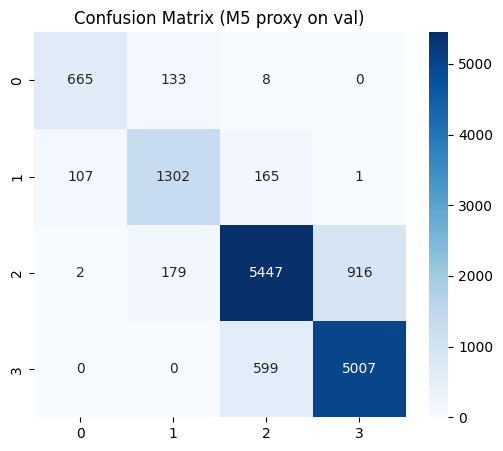

In [ ]:
def fix_label_length(X, y):
    """
    Makes sure X and y have the same number of samples.
    If one is longer, trims the extra part.
    """
    min_len = min(len(X), len(y))
    X = X[:min_len]
    y = y[:min_len]
    return X, y

# 🧩 قبل ما تبعتهم للـ pipeline
X_train_fixed, y_train_fixed = fix_label_length(X_train_processed, y_train_split)
X_val_fixed,   y_val_fixed   = fix_label_length(X_val_split, y_val_split)
X_test_fixed,  y_test_fixed  = fix_label_length(X_test_processed, y_test)

# ✅ بعد كده استخدمهم:
model, reg, feats, labels = run_pipeline(
    X_train_fixed, y_train_fixed,
    X_val_fixed, y_val_fixed,
    X_test_fixed, y_test_fixed,
    num_features,
    seq_len=30,
    device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
)


In [ ]:
feats_tr, feats_v, feats_t = feats
ytr_seq, yv_seq, yt_seq = labels


In [ ]:
_, pred_v_cls, pred_t_cls = fit_m5_proxy_and_predict(feats_tr, ytr_seq, feats_v, feats_t)


In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)

print("📊 Validation Metrics:")
print(f"Accuracy: {accuracy_score(yv_seq, pred_v_cls):.4f}")
print(f"Precision (macro): {precision_score(yv_seq, pred_v_cls, average='macro'):.4f}")
print(f"Recall (macro): {recall_score(yv_seq, pred_v_cls, average='macro'):.4f}")
print(f"F1-score (macro): {f1_score(yv_seq, pred_v_cls, average='macro'):.4f}")

print("\n📊 Test Metrics:")
print(f"Accuracy: {accuracy_score(yt_seq, pred_t_cls):.4f}")
print(f"Precision (macro): {precision_score(yt_seq, pred_t_cls, average='macro'):.4f}")
print(f"Recall (macro): {recall_score(yt_seq, pred_t_cls, average='macro'):.4f}")
print(f"F1-score (macro): {f1_score(yt_seq, pred_t_cls, average='macro'):.4f}")


📊 Validation Metrics:
Accuracy: 0.8548
Precision (macro): 0.8467
Recall (macro): 0.8443
F1-score (macro): 0.8451

📊 Test Metrics:
Accuracy: 0.8446
Precision (macro): 0.6670
Recall (macro): 0.7922
F1-score (macro): 0.7119


In [ ]:
print("\nClassification Report (Validation):")
print(classification_report(yv_seq, pred_v_cls, target_names=class_order))

print("\nClassification Report (Test):")
print(classification_report(yt_seq, pred_t_cls, target_names=class_order))



Classification Report (Validation):
                   precision    recall  f1-score   support

Non-Potable Water       0.86      0.83      0.84       806
             Fair       0.81      0.83      0.82      1575
             Good       0.88      0.83      0.85      6544
        Excellent       0.85      0.89      0.87      5606

         accuracy                           0.85     14531
        macro avg       0.85      0.84      0.85     14531
     weighted avg       0.86      0.85      0.85     14531


Classification Report (Test):
                   precision    recall  f1-score   support

Non-Potable Water       0.65      0.91      0.76        81
             Fair       0.60      0.62      0.61       112
             Good       0.45      0.78      0.57      2342
        Excellent       0.97      0.85      0.91     15629

         accuracy                           0.84     18164
        macro avg       0.67      0.79      0.71     18164
     weighted avg       0.90      0.84    

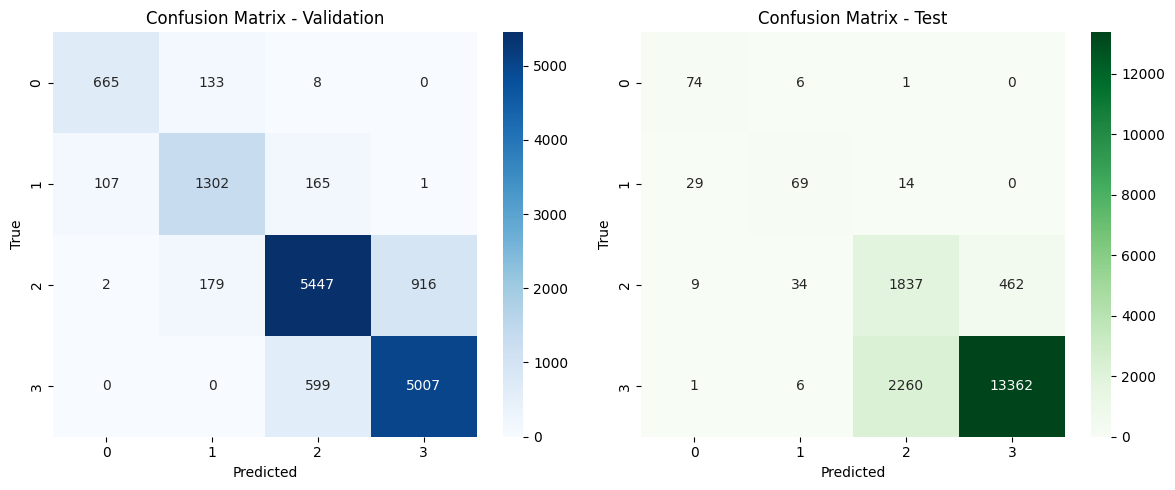

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm_val = confusion_matrix(yv_seq, pred_v_cls)
cm_test = confusion_matrix(yt_seq, pred_t_cls)

fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Confusion Matrix - Validation")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("True")

sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Confusion Matrix - Test")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("True")

plt.tight_layout()
plt.show()


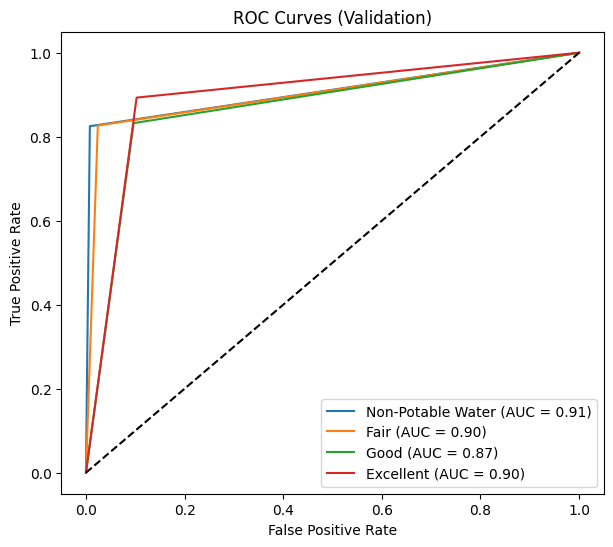

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np

yv_bin = label_binarize(yv_seq, classes=[0,1,2,3])
yt_bin = label_binarize(yt_seq, classes=[0,1,2,3])
pred_v_bin = label_binarize(pred_v_cls, classes=[0,1,2,3])
pred_t_bin = label_binarize(pred_t_cls, classes=[0,1,2,3])

fpr, tpr, roc_auc = {}, {}, {}
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(yv_bin[:, i], pred_v_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(7,6))
for i, label in enumerate(class_order):
    plt.plot(fpr[i], tpr[i], label=f"{label} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves (Validation)")
plt.legend()
plt.show()


In [ ]:
errors = yv_seq != pred_v_cls
error_rate_per_class = []
for i, cls in enumerate(class_order):
    mask = (yv_seq == i)
    err = (pred_v_cls[mask] != i).mean()
    error_rate_per_class.append(err)
    print(f"{cls}: Error Rate = {err:.2%}")


Non-Potable Water: Error Rate = 17.49%
Fair: Error Rate = 17.33%
Good: Error Rate = 16.76%
Excellent: Error Rate = 10.68%


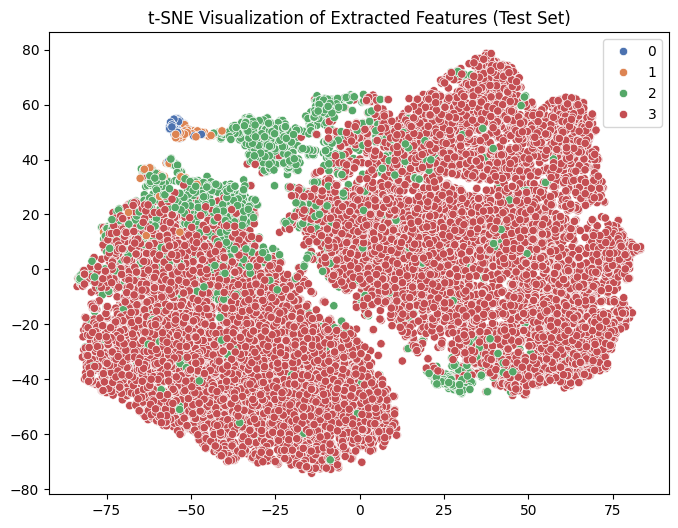

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
feats_2d = tsne.fit_transform(feats_t)

plt.figure(figsize=(8,6))
sns.scatterplot(x=feats_2d[:,0], y=feats_2d[:,1], hue=yt_seq, palette="deep", legend="full")
plt.title("t-SNE Visualization of Extracted Features (Test Set)")
plt.show()


In [ ]:
def summary_report(y_true, y_pred, split_name="Validation"):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    precision = precision_score(y_true, y_pred, average='macro')
    print(f"🔹 {split_name} Summary:")
    print(f"Accuracy: {acc:.3f}")
    print(f"F1-score: {f1:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"Precision: {precision:.3f}")
    print("-"*40)

summary_report(yv_seq, pred_v_cls, "Validation")
summary_report(yt_seq, pred_t_cls, "Test")


🔹 Validation Summary:
Accuracy: 0.855
F1-score: 0.845
Recall: 0.844
Precision: 0.847
----------------------------------------
🔹 Test Summary:
Accuracy: 0.845
F1-score: 0.712
Recall: 0.792
Precision: 0.667
----------------------------------------
